# 使用Python进行diy

## 定义一个numpy矩阵

In [72]:
import numpy as np
a = np.zeros([3,2])
a

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [73]:
a[0, 0] = 1
a[0, 1] = 2
a[1, 0] = 9
a[2, 1] = 12
a

array([[ 1.,  2.],
       [ 9.,  0.],
       [ 0., 12.]])

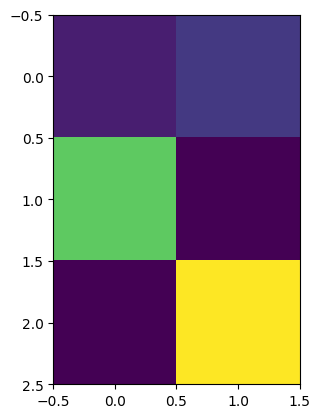

In [74]:
# 可以使用 matplotlib.pyplot 库可视化矩阵
import matplotlib.pyplot as plt

plt.imshow(a, interpolation="nearest")

----

## 完整代码

### 引入模块

In [75]:
# 计算模块
import numpy as np
# 特殊公式模块
import scipy.special as sp

### 函数集合

In [76]:
# 随机权重矩阵
def random_weight_matrix(len1, len2):
    # 正态分布
    return np.random.normal(0.0, pow(len1, -0.5), (len1, len2))

# 转为矩阵
def convert_matrix(list):
    return np.array(list, ndmin=2).T

# 计算操作
def output_calc(weight, input, activation_fn):
    return activation_fn(np.dot(weight, input))

### 定义神经网络类

In [77]:
class neuralNetwork:
    # 初始化神经网络
    def __init__(self, nodes_info, learning_grate):
        # 输入层、隐藏层、输出层
        self.nodes_input = nodes_info['input']
        self.nodes_hide = nodes_info['hide']
        self.nodes_output = nodes_info['output']

        # 学习率
        self.lr = learning_grate

        # 输入层与隐藏层之间的权重矩阵
        self.w_ih = random_weight_matrix(self.nodes_hide, self.nodes_input)
        # 隐藏层与输出层之间的权重矩阵
        self.w_ho = random_weight_matrix(self.nodes_output, self.nodes_hide)

		# 激活函数（sigmoid）
        self.activation_fn = lambda x: sp.expit(x)

        print('权重1：\n', self.w_ih, '\n权重2：\n', self.w_ho, '\n')

    # 训练神经网络
    def train(self, input_list, target_list):
        input = convert_matrix(input_list)
        target = convert_matrix(target_list)

        # 算出误差（目标 - 结果）
        # 输出层误差
        output_error = target - self.final_output
        # 隐藏层误差
        hidden_error = np.dot(self.w_ho.T, output_error)

        # 通过误差修改
        self.w_ho += self.lr * np.dot((output_error * self.final_output * (1 - self.final_output)), np.transpose(self.hidden_output))
        self.w_ih += self.lr * np.dot((hidden_error * self.hidden_output * (1 - self.hidden_output)), np.transpose(input))

    # 查询神经网络
    def query(self, input_list):
        # 将输入数组转为矩阵
        input = convert_matrix(input_list)

        self.hidden_output = output_calc(self.w_ih, input, self.activation_fn)
        self.final_output = output_calc(self.w_ho, self.hidden_output, self.activation_fn)

        return self.final_output

### 输入信息

In [78]:
# 节点信息
neural_node_info = {
    'input': 3,
    'hide': 3,
    'output': 3
}
# 学习率
learning_grate = 0.3

### 实例化对象（调用网络）

In [79]:
# 实例化一个神经网络对象
example = neuralNetwork(neural_node_info, learning_grate)
print('当前的计算结果：\n',example.query([1.0, 0.5, -1.5]))

权重1：
 [[ 0.12650502 -0.15333816 -0.2450036 ]
 [-0.11773004 -0.49219218 -0.57373363]
 [ 0.39890664 -0.59728852 -0.33758806]] 
权重2：
 [[-0.86962073 -0.49013897 -0.33073279]
 [-0.08388779 -0.32123746  0.60377964]
 [-0.27823838  0.38237811  0.3160348 ]] 

当前的计算结果：
 [[0.26056963]
 [0.53505886]
 [0.5682021 ]]


## 初始化
> 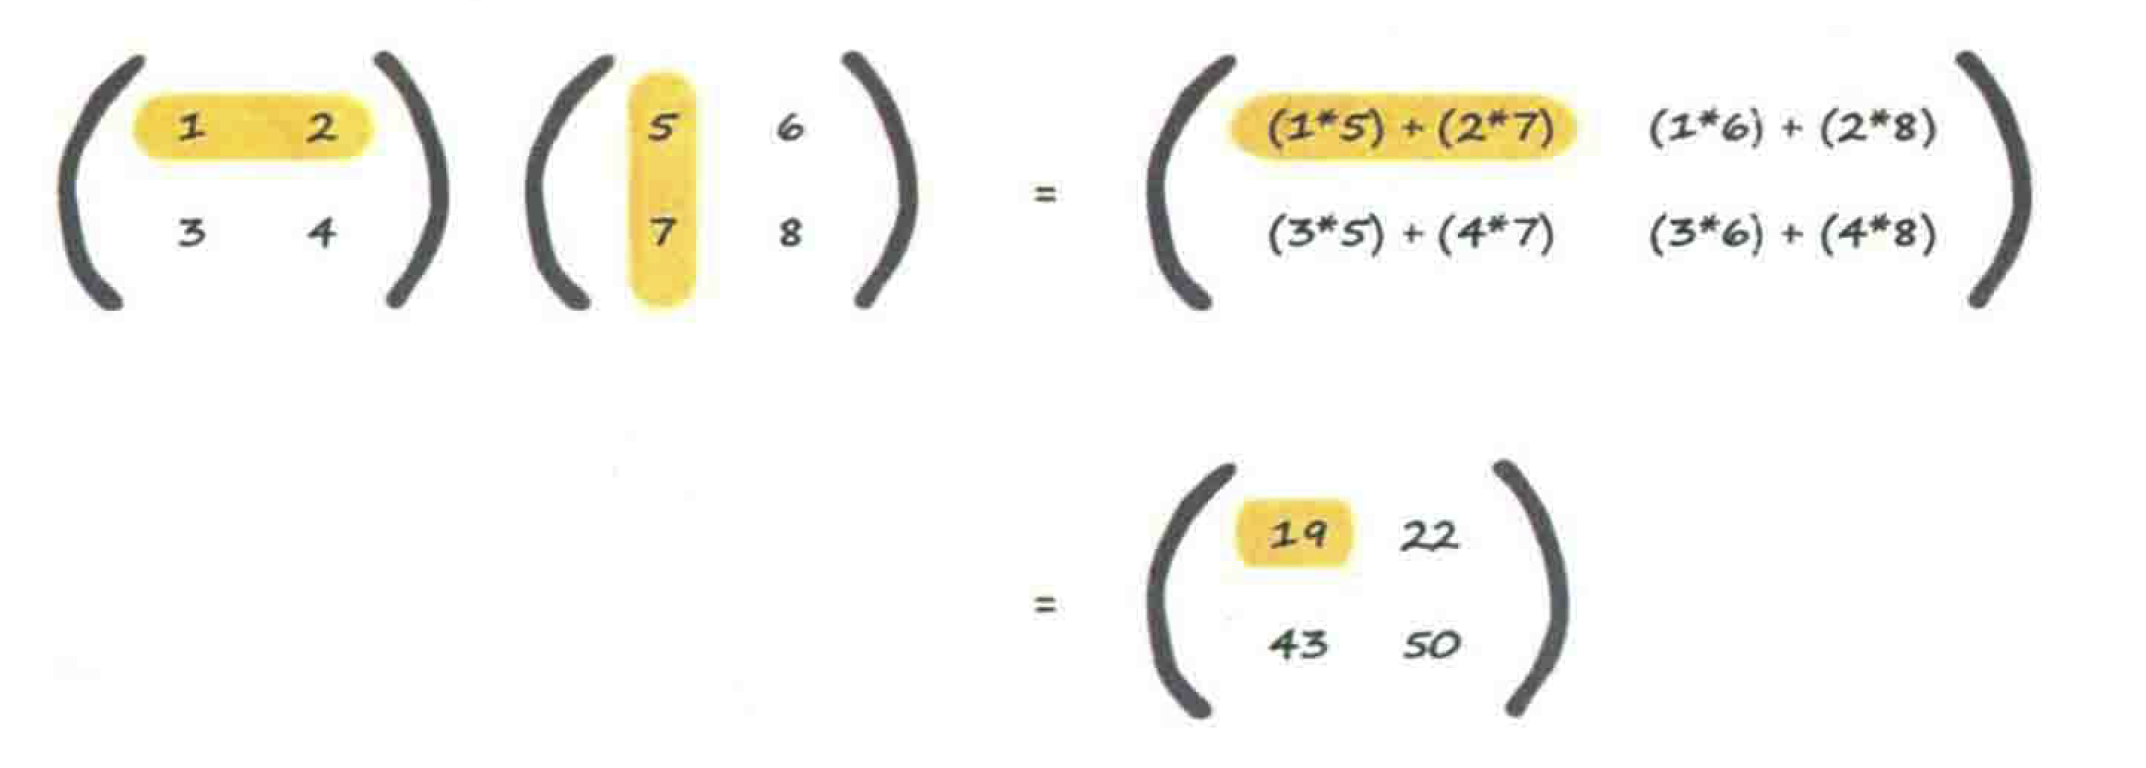

### 生成权重矩阵
> 以 `self.w_ih` 说明
#### 矩阵大小
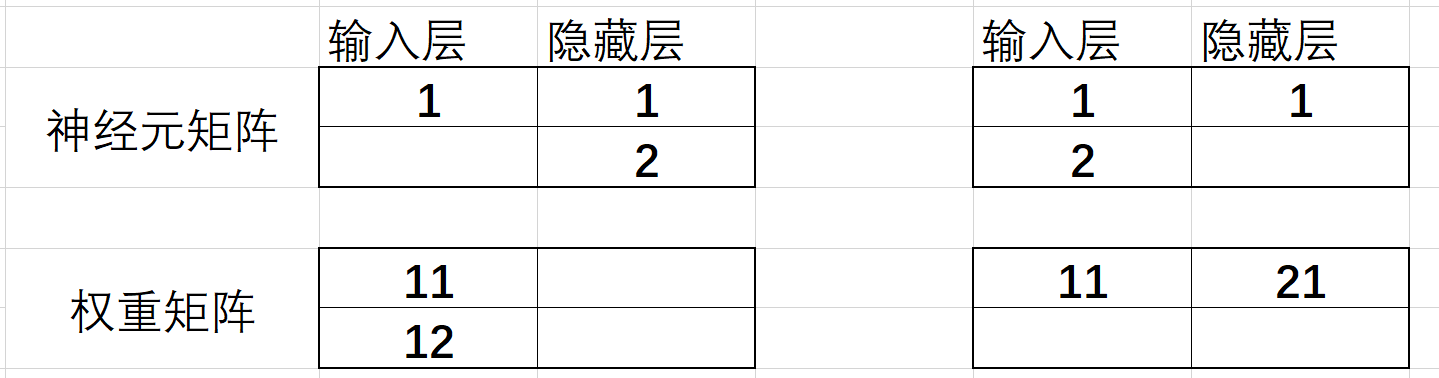
如图，因此 **输入层到隐藏层** 的权重矩阵大小为 隐藏层节点数量 * 输入层节点数量
$$



## 查询

### 返回最终计算结果

$$
\begin{align}
& 隐藏层输入 = 激活函数(三个相关的链接 分别与 输入值乘积之和) \\
& O_k = sigmoid(\sum_j W_{j,k} \cdot O_j)
\end{align}
$$

In [80]:
# 生成了一个形状为 (2, 1) 的数组。
# 数组中的每个元素都是从均值为 0、标准差为 pow(2, -0.5) 的正态分布中随机抽取的
np.random.normal(0.0, pow(2, -0.5), (2, 1))

array([[-1.29163165],
       [-1.27301488]])

In [89]:
print('二维数组:\n', np.array([1, 2, 3], ndmin=2))
print('二维数组转置:\n', np.array([1, 2, 3], ndmin=2).T)

二维数组:
 [[1 2 3]]
二维数组转置:
 [[1]
 [2]
 [3]]
